# this project is to predict using a linear regression model the price of houses based on a set of features

link to dataset: https://www.kaggle.com/datasets/shree1992/housedata

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

importing dataset

In [2]:
data= pd.read_csv('house_data.csv')

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

## Exploratory Data Analysis

### Finding out the features in the dataset that highly correlate with price. Fearture that will be important in helping the model predict properly

In [6]:
print(data.corr()['price'].sort_values())

yr_renovated    -0.028774
yr_built         0.021857
condition        0.034915
sqft_lot         0.050451
waterfront       0.135648
floors           0.151461
bedrooms         0.200336
sqft_basement    0.210427
view             0.228504
bathrooms        0.327110
sqft_above       0.367570
sqft_living      0.430410
price            1.000000
Name: price, dtype: float64


In [7]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

### Dropped the columns that will not have any impact on our prediction

In [8]:
data.drop(['street','city','country','date','yr_renovated','statezip'],axis=1,inplace=True)

In [9]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built'],
      dtype='object')

### Used a barplot to compare how the price and the number of bedrooms correlate

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

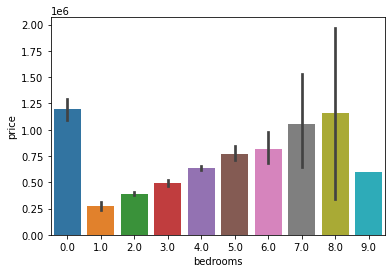

In [10]:
sns.barplot(x='bedrooms',y='price',data=data)

### Used a regplot to determine how the price relates to the 'sqft_living'  

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

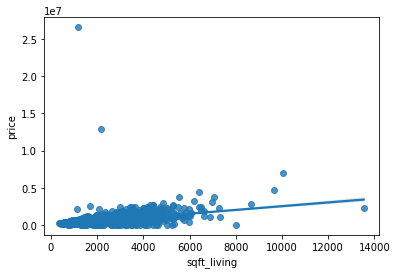

In [11]:
sns.regplot(data=data, x='sqft_living',y='price')

 # Model Development using Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

split dataset into both the target variable(y) and indepedent variable(x)

In [13]:
x=data.drop(['price'],axis=1)
x.shape

(4600, 11)

In [14]:
y=data['price']
y.shape

(4600,)

In [15]:
# scaling the data
scale = StandardScaler()
scaled_x=scale.fit_transform(x)

#### Splitting the dataset into a train and test part with 80% of data for training and 20% for testing

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [17]:
x_train.shape

(3680, 11)

#### Creating a Linear Regression Model

In [18]:
model=LinearRegression()

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
print(model.predict(x_test[0:10]))

[ 513611.01031232  725300.91935864  386388.59781944  362409.25228652
 1179176.59393837  304614.09069458  223537.70425564  305852.69402985
  472088.30721616  400511.15183524]


In [21]:
# preformance of the model
model.score(x_test,y_test)

0.49249127808613513